<a href="https://colab.research.google.com/github/nishant3101/Computer-Vision-Assignments-and-Homeworks/blob/main/CV_homeworks_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework-1** - Count the number of objects in a grayscale image


In [ ]:
import numpy as np
from PIL import Image
image = Image.open('/content/drive/MyDrive/CV materials/hw1.png')
data = np.asarray(image)
 
def countobjects(image):
    data=image.copy()
    rows = len(data)
    cols =len(data[0])
    all_objects=[]
    count = 0
    for i in range(rows):
        for j in range(cols):
            if data[i][j] == 255:
                count += 1
                current_object=[]
                current_object.append([i,j])
                stack = [(i,j)]
                while stack:
                    ii, jj = stack.pop()
                    if 0<=ii<rows and 0<=jj<cols and data[ii][jj] == 255:
                        current_object.append([ii,jj])
                        data[ii][jj] = 0
                        stack.extend([(ii+1,jj),(ii-1,jj),(ii,jj-1),(ii,jj+1)])
                
                all_objects.append(current_object)
                
    return all_objects
 



In [ ]:
obj=countobjects(data)
print("The number of objects present in this image are")
print(obj)

The number of objects present in this image are
[[[14, 745], [14, 745], [14, 746], [14, 747], [14, 748], [14, 749], [14, 750], [14, 751], [14, 752], [14, 753], [14, 754], [14, 755], [14, 756], [14, 757], [14, 758], [14, 759], [14, 760], [14, 761], [14, 762], [14, 763], [14, 764], [14, 765], [14, 766], [14, 767], [15, 767], [15, 768], [15, 769], [15, 770], [15, 771], [15, 772], [16, 772], [16, 773], [16, 774], [16, 775], [17, 775], [17, 776], [17, 777], [17, 778], [18, 778], [18, 779], [19, 779], [19, 780], [19, 781], [19, 782], [20, 782], [20, 783], [20, 784], [21, 784], [21, 785], [22, 785], [22, 786], [23, 786], [23, 787], [24, 787], [24, 788], [25, 788], [25, 789], [25, 790], [26, 790], [26, 791], [27, 791], [27, 792], [28, 792], [28, 793], [29, 793], [29, 794], [30, 794], [30, 793], [30, 792], [30, 791], [30, 790], [30, 789], [30, 788], [30, 787], [30, 786], [30, 785], [30, 784], [30, 783], [30, 782], [30, 781], [30, 780], [30, 779], [30, 778], [30, 777], [30, 776], [30, 775], [30,

# New Section

# **Homework-2**- Otsu Algorithm for foreground extraction (image thresholding)


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from PIL import Image
img = Image.open('/content/drive/MyDrive/CV materials/midrgb.png')
image=np.asarray(img)

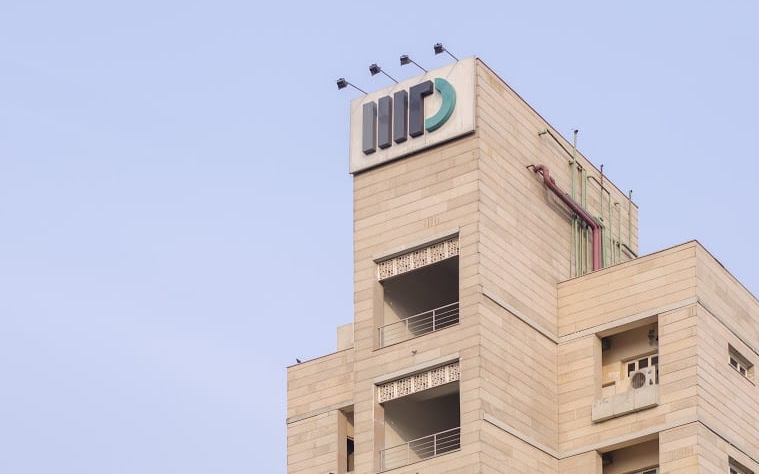

In [ ]:
img

In [ ]:
from google.colab.patches import cv2_imshow
histr = cv2.calcHist([grayimg],[0],None,[256],[0,256])
plt.plot(histr) 
plt.show() 

NameError: ignored

In [ ]:
histr.astype(int)

In [ ]:
grayimg=cv2.imread('/content/drive/MyDrive/CV materials/midsem.png',0)
cv2_imshow(grayimg)

In [ ]:
def otsu_algorithm(grayimage):
  total_pixels=grayimage.size
  histogram=cv2.calcHist([grayimage],[0],None,[256],[0,256])
  histogram=histogram.astype(int)
  intra_class_array=[]
  #so histogram has 255 values 
  for i in range(1,len(histogram)):
    part1,part2=np.split(histogram,[i])
    w1=(np.sum(part1))/total_pixels
    w2=(np.sum(part2))/total_pixels
    #weights of both classes done, now calculate variance of both the classes
    mean1=np.sum([x*y for x,y in enumerate(part1)])/(np.sum(part1)+0.00001)  #here x is the pixel value and y is the number of pixels for that value
    mean2=np.sum([x2*y2 for x2,y2 in enumerate(part2)])/(np.sum(part2)+0.0001)
    variance1=np.sum([(x-mean1)**2*y for x,y in enumerate(part1)])
    variance2=np.sum([(x-mean2)**2*y for x,y in enumerate(part2)])
    variance1=np.nan_to_num(variance1)
    variance2=np.nan_to_num(variance2)
    mean1=np.nan_to_num(mean1)
    mean2=np.nan_to_num(mean2)
    intra_class=(variance1)+(variance2)
    intra_class_array.append(intra_class)

  min_value=np.argmin(intra_class_array)
  #print("Final threshold is:")
  ##print(min_value)
  #print("Within class variance at final threshold is ")
  #print(intra_class_array[min_value])
  return min_value

"""Taking assumptions into consideration

"""

def give_final_image(rgb_image, gray_image):
  final_threshold=otsu_algorithm(gray_image)
  #Now we have the final threshold, taking assumption that the centre might contain the object and the corner pixel might contain the background, 
  output_img=gray_image.copy()
  centre_x=int(len(gray_image)/2)
  centre_y=int(len(gray_image[0])/2)
  corner_x=0
  corner_y=0
  min_i=len(gray_image)+1
  min_j=len(gray_image[0])+1
  max_i=0
  max_j=0
  #gray_image[0][0]<=final_threshold and
  if  gray_image[centre_x][centre_y]>final_threshold:
    #now in this case we know that centre pixel is >threshold so all the pixels which are >threshold will retain their value and all the pixels <threshold would get blue
    for i in range(len(rgb_image)):
      for j in range(len(rgb_image[0])):
        if gray_image[i][j]<=final_threshold:
          output_img[i][j]=0
        else: #this is  where the object is 
          output_img[i][j]=gray_image[i][j]
    
  else:
    #now in this case, we know that centre pixel is <threshold so all the points which are <threshold will retain their color and all those which are > would get blue
    for i in range(len(rgb_image)):
      for j in range(len(rgb_image[0])):
        if gray_image[i][j]>final_threshold:
          output_img[i][j]=0
        else:
          output_img[i][j]=gray_image[i][j]

  fig,ax = plt.subplots(1)
  ax.imshow(output_img)
  import matplotlib.patches as patches
  #rect=patches.Rectangle((min_j, min_i), max_j, max_i,linewidth=5,edgecolor='r',facecolor='none')
  #ax.add_patch(rect)
  #plt.show()'''

  return output_img
    
    





In [ ]:
threshold=otsu_algorithm(grayimg)
print(threshold)

In [ ]:
op=image.copy()
for i in range(len(image)):
  for j in range(len(image[0])):
    if(grayimg[i][j]<threshold):
      op[i][j]=[0,0,255]


Taking assumptions into consideration


In [ ]:
op=give_final_image(image,grayimg)

In [ ]:
cv2_imshow(op)

In [ ]:
fig,ax = plt.subplots(1)
ax.imshow(op)
import matplotlib.patches as patches
rect=patches.Rectangle((0, 150), 600, 500,linewidth=5,edgecolor='r',facecolor='none')
ax.add_patch(rect)
plt.show()

# **Homework-3- Background subtraction for a dynamic and a static object**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import scipy
from scipy import stats

from PIL import Image
#img = Image.open('/content/drive/MyDrive/CV materials/hw2.jpg')
#image=np.asarray(img)

In [ ]:
def dynamic_video(flag):
  all_images=[]
  for i in range (68):
  #cur_img=cv2.imread(("/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg",i),0)
  #img = Image.open('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i).convert('LA')
    img=cv2.imread(('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i),0)
    cur_image=np.asarray(img)
    all_images.append(cur_image)

  if flag==1:
    background=np.mean(all_images,axis=0)
  elif flag==2:
    background = np.median(all_images, axis=0)  
  else:
    modeFrame=stats.mode(all_images,axis=0)
    background=modeFrame[0][0]

  cv2_imshow(background)
  new_images=all_images.copy()
  for i in range(68):
    orig_frame=new_images[i]
    for j in range(len(orig_frame)):
      for k in range (len(orig_frame[0])):
        orig_pixel=orig_frame[j][k]
        mean_pixel=background[j][k]
        orig_frame[j][k]=abs(orig_frame[j][k]-mean_pixel)

    new_images[i]=orig_frame

  all_color_images=[]
  for i in range (68):
    #cur_img=cv2.imread(("/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg",i),0)
    img = Image.open('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i)
    #img=cv2.imread(('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i),0)
    cur_image=np.asarray(img)
    all_color_images.append(cur_image)

  final_frames=[]
  for i in range(68):
    final=give_final_image(all_color_images[i],new_images[i])
    final_frames.append(final)

  return final_frames

def static_video(flag):
  all_images=[]
  for i in range (220):
  #cur_img=cv2.imread(("/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg",i),0)
  #img = Image.open('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i).convert('LA')
    img=cv2.imread(('/content/drive/MyDrive/CV materials/Frames_static_4/frame%d.jpg' % i),0)
    cur_image=np.asarray(img)
    all_images.append(cur_image)

  if flag==1:
    background=np.mean(all_images,axis=0)
  elif flag==2:
    background = np.median(all_images, axis=0)  
  else:
    modeFrame=stats.mode(all_images,axis=0)
    background=modeFrame[0][0]

  cv2_imshow(background)
  new_images=all_images.copy()
  for i in range(220):
    orig_frame=new_images[i]
    for j in range(len(orig_frame)):
      for k in range (len(orig_frame[0])):
        orig_pixel=orig_frame[j][k]
        mean_pixel=background[j][k]
        orig_frame[j][k]=abs(orig_frame[j][k]-mean_pixel)

    new_images[i]=orig_frame

  all_color_images=[]
  for i in range (220):
    #cur_img=cv2.imread(("/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg",i),0)
    img = Image.open('/content/drive/MyDrive/CV materials/Frames_static_4/frame%d.jpg' % i)
    #img=cv2.imread(('/content/drive/MyDrive/CV materials/Frames_dynamic/frame%d.jpg' % i),0)
    cur_image=np.asarray(img)
    all_color_images.append(cur_image)

  final_frames=[]
  for i in range(220):
    final=give_final_image(all_color_images[i],new_images[i])
    final_frames.append(final)

  return final_frames










In [ ]:
ans=dynamic_video(1)


In [ ]:
cv2_imshow(ans[0])

In [ ]:
for i in range(68):
  im=ans[i]
  #gr_im= Image.fromarray(im).save('frame%d.png %i.jpg')
  cv2.imwrite('/content/drive/MyDrive/CV materials/output_dynamic/frame%d.jpg' %i, im)

# **Homework-4**- Spatial pyramic pooling

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math

In [ ]:
img = Image.open('/content/drive/MyDrive/CV materials/hw4.jpg')
img

In [ ]:
image=np.asarray(img)

In [ ]:
image_r = cv2.resize(image, (240, 240)) 

In [ ]:
cv2_imshow(image_r)

In [ ]:
def divide_into_n(n,image):
  root=int(math.sqrt(n))
  rows=int(240/root)
  cols=rows
  super_array=[]
  startrow=startcol=0
  endrow=endcol=cols
  for i in range(1,root+1):
    startcol=0
    endcol=cols
    for iter in range(1,root+1):
      cur_part=image[startrow:endrow,startcol:endcol]
      super_array.append(cur_part)
      startcol=startcol+cols
      endcol=endcol+cols
    
    startrow=startrow+rows
    endrow=endrow+rows


  return super_array





In [ ]:
#out1=divide_into_n(4,image_r)

In [ ]:
parent_array=[]
gmd=[]
for i in [4,9,16,25]:
  cur_supe=divide_into_n(i,image_r)
  for j in range(len(cur_supe)):
    cur_img=cur_supe[j]
    for k in range(3):
      gmd.append(np.mean(cur_img[:,:,k]))
      gmd.append(np.std(cur_img[:,:,k]))


In [ ]:
GFD_vector=pd.DataFrame(np.asarray(gmd))

In [ ]:
GFD_vector

In [ ]:
np.savetxt('GFD_Vector.txt', GFD_vector.values)

# Homework-5- Local Binary Pattern

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math

In [ ]:
#img = Image.open('/content/drive/MyDrive/CV materials/hw5.png')
image=cv2.imread('/content/drive/MyDrive/CV materials/hw5.png',0)
cv2_imshow(image)

In [ ]:
#image_r = cv2.resize(image, (240, 240)) 

In [ ]:
def divide_into_n(n,image):
  nrow=image.shape[0]
  ncol=image.shape[1]
  root=int(math.sqrt(n))
  rows=int(nrow/root)
  cols=int(ncol/root)
  super_array=[]
  startrow=startcol=0
  endrow=rows
  endcol=cols
  for i in range(1,root+1):
    startcol=0
    endcol=cols
    for iter in range(1,root+1):
      cur_part=image[startrow:endrow,startcol:endcol]
      super_array.append(cur_part)
      startcol=startcol+cols
      endcol=endcol+cols
    
    startrow=startrow+rows
    endrow=endrow+rows

  return super_array

In [ ]:
arr=divide_into_n(4,image)

In [ ]:
#cv2_imshow(arr[3])

In [ ]:
def do_zero_padding(patch):
  rows=patch.shape[0]
  cols=patch.shape[1]
  zero_padded=np.zeros((rows+2,cols+2))
  zero_padded[1:rows+1,1:cols+1]=patch

  return zero_padded


In [ ]:
def histogram_generator(patch1,arr):
  orig_rows=arr.shape[0]
  orig_cols=arr.shape[1]
  new_rows=patch1.shape[0]
  new_cols=patch1.shape[1]
  empty_hist=np.zeros((orig_rows,orig_cols))
  for i in range(1,orig_rows+1):
    for j in range(1,orig_cols+1):
      concerned_pixel=patch1[i][j]
      cur_dec=[]
      directions=[[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]]
      for iter in range(8):
        cur_pair=directions[iter]
        cur_pixel=patch1[i+cur_pair[0]][j+cur_pair[1]]
        if cur_pixel>concerned_pixel:
          cur_dec.append(1)
        else:
          cur_dec.append(0)

      cur_binary = int("".join(str(x) for x in cur_dec), 2) 
      empty_hist[i-1][j-1]=cur_binary
  mod=np.uint8(empty_hist)
  histogram=cv2.calcHist([mod],[0],None,[256],[0,256])
  histogram=histogram.astype('int')
  hist1d=[]
  for num in range(256):
    hist1d.append(histogram[num][0])
  return hist1d

In [ ]:
feature_vector=[]
for i in range(4):
  orig_patch=arr[i]
  padded_patch=do_zero_padding(orig_patch)
  cur_histogram=histogram_generator(padded_patch,orig_patch)
  for num in range(256):
    feature_vector.append(cur_histogram[num])

In [ ]:
LBP_vector=pd.DataFrame(feature_vector)
np.savetxt('LBP_Vector.txt', LBP_vector.values)

# Homework-6

# New Section

In [ ]:
import numpy as np

In [ ]:
matrix=[[1, 9, 9],[1, 9, 9],[1, 1, 1]]

In [ ]:
np.pad(matrix,pad_width=(1),mode='symmetric')

In [ ]:
ix=[[-8, 0, 0],[-8, 0, 0],[0, 0, 0]]
iy=[[0,0,0],[0,8,8],[0,0,0]]

In [ ]:
np.matmul(ix,iy)

# Assignment-1


In [ ]:
import numpy as np
from PIL import Image
import cv2
image = Image.open('/content/drive/MyDrive/CV materials/hw1.png')
data = np.asarray(image)
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math

In [ ]:
cv2_imshow(data)

In [ ]:
contours, hierarchy = cv2.findContours(data, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
len(contours)

**Welzl Algorithm**

In [ ]:
import random 
import math
from sympy.geometry import Point2D, Segment2D, Circle

In [ ]:
contours, hierarchy = cv2.findContours(data, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
def finddistance(p1,p2):
  dist=math.sqrt(math.pow(p2[1]-p1[1],2)+math.pow(p2[0]-p1[0],2))
  return dist

def presentincircle(point,circle):
  center=circle[0]
  radius=circle[1]
  distance=finddistance(point,center)
  if distance > radius:
    return False
  else:
    return True

def welzl(P,R):

  if not P or len(R)==3:
    if len(R)==1:
      radius=0;
      center=R[0]
      circle=[center,radius]
      return circle

    elif len(R)==2:
      point1=R[0]
      point2=R[1]
      cx=(point1[0]+point2[0])/2
      cy=(point1[1]+point2[1])/2
      radius=finddistance([cx,cy],point1)
      circle=[]
      circle.append([cx,cy])
      circle.append(radius)
      return circle

    elif len(R)==3:
      point1=R[0]
      point2=R[1]
      point3=R[2]
      temp1=(point2[0]-point1[0])*(point2[0]+point1[0])*0.5 + (point2[1]-point1[1])*(point2[1]+point1[1])*0.5
      temp2=(point3[0]-point1[0])*(point3[0]+point1[0])*0.5 + (point3[1]-point1[1])*(point3[1]+point1[1])*0.5
      temp3=(point2[0]-point1[0])*(point3[1]-point1[1]) - (point2[1]-point1[1])*(point3[0]-point1[0])+0.2
      #print(temp1,temp2,temp3)
      centerx=(((point3[1]-point1[1])*temp1 - (point2[1]-point1[1])*temp2)/temp3)
      centery=(((point1[0]-point3[0])*temp1 + (point2[0]-point1[0])*temp2)/temp3)

      radius=int(math.sqrt(math.pow(point1[1]-centery,2)+math.pow(point1[0]-centerx,2)))
      #circle=[(centerx,centery),radius]
      circle=[]
      circle.append([centerx,centery])
      circle.append(radius)
      return circle
    else:
      return None

  else:
    #not trivial so remove a value randomly from P
    index=random.randint(0,len(P)-1)
    point=P[index]
    Pcopy=P.copy()
    Pcopy.remove(point)
    D=welzl(Pcopy,R)

    if D is not None and presentincircle(point,D):
      return D

    else:
      Rcopy=R.copy()
      Rcopy.append(point)
      return welzl(Pcopy,Rcopy)



In [ ]:
R=[]
b=[]
a=contours[7].tolist()
for j in range(len(a)):
    b.append(a[j][0])

print(welzl(b,R))

In [ ]:
final_answers=[]
datacopy=np.asarray(image)
for i in range(len(contours)):
  a=contours[i].tolist()
  circleFound=False
  b=[]
  if i==7 :
    limit=len(a)-100
  else:
    limit=len(a)
  for j in range(limit):
    b.append(a[j][0])
  q=[]
  temp=[]
  for iter in range (10):
    circle = welzl(b, q)
    temp.append(circle)

  cur_min=999999999
  cur_center=[]
  for m in range(len(temp)):
    cur_circle=temp[m]
    cur_radius=cur_circle[1]
    if cur_radius<cur_min:
      cur_min=cur_radius
      cur_center=cur_circle[0]
  cur=[]
  center=cur_center
  radius=int(cur_min)
  cur.append(center)
  cur.append(radius)
  final_answers.append(cur)
  centerx=int(center[0])
  centery=int(center[1])
  datacopy=cv2.circle(datacopy, (centerx,centery), radius, (255, 0, 0), thickness=1, lineType=8, shift=0)
  print("1")

cv2_imshow(datacopy)


In [ ]:
df=pd.DataFrame(np.asarray(final_answers))
df

In [ ]:
np.savetxt('Values.txt',df.values,fmt='%s')

In [ ]:
contours1, hierarchy1 = cv2.findContours(datacopy, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [ ]:
len(contours1)

In [ ]:
test=data.copy()


In [ ]:
def countobjects(image):
    data=image.copy()
    rows = len(data)
    cols =len(data[0])
    all_objects=[]
    count = 0
    for i in range(rows):
        for j in range(cols):
            if data[i][j] == 255:
                count += 1
                current_object=[]
                current_object.append([i,j])
                stack = [(i,j)]
                while stack:
                    ii, jj = stack.pop()
                    if 0<=ii<rows and 0<=jj<cols and data[ii][jj] == 255:
                        current_object.append([ii,jj])
                        data[ii][jj] = 0
                        stack.extend([(ii+1,jj),(ii-1,jj),(ii,jj-1),(ii,jj+1)])
                
                all_objects.append(current_object)
                
    return all_objects


In [ ]:
all_objects=countobjects(data)
all_objects_masks=[]
for i in range(len(all_objects)):
  black=np.zeros(data.shape)
  current_object=all_objects[i]
  for i in range(len(current_object)):
    black[current_object[i][0],current_object[i][1]]=255

  all_objects_masks.append(black)

In [ ]:
cv2_imshow(all_objects_masks[7])

In [ ]:
all_circle_masks=[]
for j in range(len(final_answers)):
  cur_circlea=final_answers[j]
  xc=int(cur_circlea[0][0])
  yc=int(cur_circlea[0][1])
  radiuss=int(cur_circlea[1])
  mask = np.zeros(data.shape)
  mask = cv2.circle(mask, (xc,yc), radiuss, (255,255,255), -1)
  print(mask)
  #cv2_imshow(mask)
  all_circle_masks.append(mask)

In [ ]:
all_circle_masks.reverse()

In [ ]:
cv2_imshow(all_circle_masks[6])

In [ ]:
all_circle_masks

In [ ]:
final_answers

In [ ]:
def jaccard(image1,image2):
  intersection=0
  union=0
  for i in range(image1.shape[0]):
    for j in range(image1.shape[1]):
      if image1[i][j]==255 and image2[i][j]==255:
        intersection=intersection+1
        union=union+1
      elif image1[i][j]==255 and image2[i][j]==0:
        union=union+1
  
  score=intersection/union
  return score


In [ ]:
jaccard(all_circle_masks[0],all_objects_masks[0])

In [ ]:
all_circle_masks[0].shape[0]

In [ ]:
jaccard_scores=[]
for n in range(len(all_objects)):
  cur_score=jaccard(all_circle_masks[n],all_objects_masks[n])
  jaccard_scores.append(cur_score)

In [ ]:
da=pd.DataFrame(jaccard_scores)
np.savetxt('jaccard.txt',da.values,fmt='%s')


In [ ]:
da

# Homework-11

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math

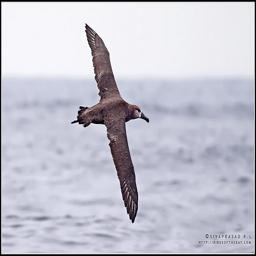

In [ ]:
#img = Image.open('/content/drive/MyDrive/CV materials/hw5.png')
image=cv2.imread('/content/drive/MyDrive/CV materials/hw11.jpg')
cv2_imshow(image)

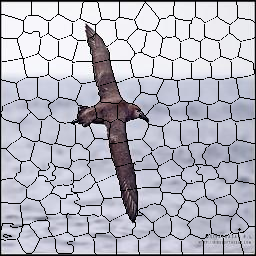

In [ ]:
import cv2
import numpy as np
img = image
#Initialize the slic item, the average size of super pixels is 20 (default is 10), and the smoothing factor is 20
slic = cv2.ximgproc.createSuperpixelSLIC(img,region_size=20,ruler = 20.0) 
slic.iterate(10)     #Number of iterations, the greater the better
mask_slic = slic.getLabelContourMask() #Get Mask, Super pixel edge Mask==1
label_slic = slic.getLabels()        #Get superpixel tags
number_slic = slic.getNumberOfSuperpixels()  #Get the number of super pixels
mask_inv_slic = cv2.bitwise_not(mask_slic)  
img_slic = cv2.bitwise_and(img,img,mask =  mask_inv_slic) #Draw the superpixel boundary on the original image
cv2_imshow(img_slic)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2_imshow(label_slic)

In [ ]:
overlay = np.dstack([label_slic] * 3)
cv2_imshow(overlay)

In [ ]:
dst = cv2.addWeighted(overlay,0.5,image,0.5,0,dtype=cv2.CV_64F)

In [ ]:
cv2_imshow(dst)

In [ ]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt

img_segments = segmentation.slic(image, compactness=20, n_segments=163)
superpixels = color.label2rgb(img_segments, img, kind='avg')

In [ ]:
cv2_imshow(img_segments)

In [ ]:
cv2_imshow(superpixels)

In [ ]:
from skimage.measure import regionprops

regions = regionprops(img_segments)
all_centers=[]
for props in regions:
    cx, cy = props.centroid
    all_centers.append([cx,cy])

# Midsem


Q1

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
img = Image.open('/content/drive/MyDrive/CV materials/midrgb.png')
image=np.asarray(img)

In [ ]:
from google.colab.patches import cv2_imshow
histr = cv2.calcHist([grayimg],[0],None,[256],[0,256])
plt.plot(histr) 
plt.show() 

In [ ]:
histr.astype(int)

In [ ]:
grayimg=cv2.imread('/content/drive/MyDrive/CV materials/midsem.png',0)
cv2_imshow(grayimg)

In [ ]:
def otsu_algorithm(grayimage):
  total_pixels=grayimage.size
  histogram=cv2.calcHist([grayimage],[0],None,[256],[0,256])
  histogram=histogram.astype(int)
  intra_class_array=[]
  #so histogram has 255 values 
  for i in range(1,len(histogram)):
    part1,part2=np.split(histogram,[i])
    w1=(np.sum(part1))/total_pixels
    w2=(np.sum(part2))/total_pixels
    #weights of both classes done, now calculate variance of both the classes
    mean1=np.sum([x*y for x,y in enumerate(part1)])/(np.sum(part1)+0.00001)  #here x is the pixel value and y is the number of pixels for that value
    mean2=np.sum([x2*y2 for x2,y2 in enumerate(part2)])/(np.sum(part2)+0.0001)
    variance1=np.sum([(x-mean1)**2*y for x,y in enumerate(part1)])
    variance2=np.sum([(x-mean2)**2*y for x,y in enumerate(part2)])
    variance1=np.nan_to_num(variance1)
    variance2=np.nan_to_num(variance2)
    mean1=np.nan_to_num(mean1)
    mean2=np.nan_to_num(mean2)
    intra_class=(variance1)+(variance2)
    intra_class_array.append(intra_class)

  min_value=np.argmin(intra_class_array)
  print("Final threshold is:")
  print(min_value)
  print("TSS is ")
  print(intra_class_array[min_value])
  return min_value

"""Taking assumptions into consideration

"""

def give_final_image(rgb_image, gray_image):
  final_threshold=otsu_algorithm(gray_image)
  #Now we have the final threshold, taking assumption that the centre might contain the object and the corner pixel might contain the background, 
  output_img=gray_image.copy()
  centre_x=int(len(gray_image)/2)
  centre_y=int(len(gray_image[0])/2)
  corner_x=0
  corner_y=0
  min_i=len(gray_image)+1
  min_j=len(gray_image[0])+1
  max_i=0
  max_j=0
  #gray_image[0][0]<=final_threshold and
  #if  gray_image[centre_x][centre_y]>final_threshold:
    #now in this case we know that centre pixel is >threshold so all the pixels which are >threshold will retain their value and all the pixels <threshold would get blue
  for i in range(len(rgb_image)):
    for j in range(len(rgb_image[0])):
      if gray_image[i][j]<=final_threshold:
        output_img[i][j]=0
      else: #this is  where the object is 
        output_img[i][j]=255
  '''else:
    #now in this case, we know that centre pixel is <threshold so all the points which are <threshold will retain their color and all those which are > would get blue
    for i in range(len(rgb_image)):
      for j in range(len(rgb_image[0])):
        if gray_image[i][j]>final_threshold:
          output_img[i][j]=0
        else:
          output_img[i][j]=gray_image[i][j]
  '''
  #fig,ax = plt.subplots(1)
  #ax.imshow(output_img)
  #import matplotlib.patches as patches
  #rect=patches.Rectangle((min_j, min_i), max_j, max_i,linewidth=5,edgecolor='r',facecolor='none')
  #ax.add_patch(rect)
  #plt.show()'''

  return output_img
    
    





In [ ]:
threshold=otsu_algorithm(grayimg)
print(threshold)

In [ ]:
op=give_final_image(image,grayimg)

In [ ]:
cv2_imshow(op)

Q4

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
def do_zero_padding(patch):
  rows=patch.shape[0]
  cols=patch.shape[1]
  zero_padded=np.zeros((rows+2,cols+2))
  zero_padded[1:rows+1,1:cols+1]=patch

  return zero_padded

def histogram_generator(patch1,arr):
  orig_rows=arr.shape[0]
  orig_cols=arr.shape[1]
  new_rows=patch1.shape[0]
  new_cols=patch1.shape[1]
  empty_hist=np.zeros((orig_rows,orig_cols))
  for i in range(1,orig_rows+1):
    for j in range(1,orig_cols+1):
      concerned_pixel=patch1[i][j]
      cur_dec=[]
      directions=[[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]]
      for iter in range(8):
        cur_pair=directions[iter]
        cur_pixel=patch1[i+cur_pair[0]][j+cur_pair[1]]
        mini=min(concerned_pixel,cur_pixel)
        maxi=max(concerned_pixel,cur_pixel)
        #if maxi==0:
         # maxi=1

        divi=(mini)/(maxi+0.00001)
        #divi=round(divi)
        if divi>=0.6:
          cur_dec.append(1)
        else:
          cur_dec.append(0)

      cur_binary = int("".join(str(x) for x in cur_dec), 2) 
      empty_hist[i-1][j-1]=cur_binary


  mod=np.uint8(empty_hist)
  cv2_imshow(mod)
  return mod

In [ ]:
grayimg=cv2.imread('/content/drive/MyDrive/CV materials/midsem.png',0)
padded=do_zero_padding(grayimg)
histogram_generator(padded,grayimg)

# HW-13

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
img = Image.open('/content/drive/MyDrive/CV materials/hw-13.PNG')
img2=cv2.imread('/content/drive/MyDrive/CV materials/hw-13.PNG')
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [ ]:

imgarray = img2.reshape((-1, 3))
# convert to float
imgarray = np.float32(imgarray)

In [ ]:
imgarray.shape

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv2.kmeans(imgarray, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
labels=labels.flatten()
labels.shape

In [ ]:
centers_img = np.uint8(centers)
segmented_image = centers_img[labels]

In [ ]:
centers

In [ ]:
unique, counts = np.unique(labels, return_counts=True)
print(len(all_clusters[0]))
print(counts[0])

In [ ]:
all_clusters=[]
for i in range(6):
  cur_cluster=imgarray[labels==i]
  all_clusters.append(cur_cluster)

Contrast cue

In [ ]:
def contrast_cue(all_clusters,N,centers):
  contrast_cue_values=[]
  for i in range(6):
    cur_center=centers[i]
    init_sum=0
    for j in range(6):
      if i != j:
        ni=counts[j]
        other_center=centers[j]
        l2norm=math.sqrt(pow(cur_center[0]-other_center[0],2)+pow(cur_center[1]-other_center[1],2)+pow(cur_center[2]-other_center[2],2))
        init_sum=init_sum + ((ni*l2norm)/N)

    contrast_cue_values.append(init_sum)

  return contrast_cue_values

In [ ]:
contrast_cue=contrast_cue(all_clusters,79218,centers)

In [ ]:
len(contrast_cue)

In [ ]:
contrast_cue

In [ ]:
contrast_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image = contrast_cue_img.reshape((-1))

In [ ]:
masked_image

In [ ]:
for l in range(6):
  masked_image[labels == l]=contrast_cue[l] 

In [ ]:
masked_image = masked_image.reshape((img2.shape[0],img2.shape[1]))

In [ ]:
img2[int(img2.shape[0]/2),int(img2.shape[1]/2)]

In [ ]:
cv2_imshow(masked_image)

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(masked_image,cmap='Greys', interpolation='nearest')

In [ ]:
labels_reshaped = labels.reshape((img2.shape[0],img2.shape[1]))
labels

In [ ]:
all_clusters_2 = []
for i in range(6):
    all_clusters_2.append([])
for i in range(len(labels)):
    all_clusters_2[labels[i]].append([imgarray[i], [i // img2.shape[0], i % img2.shape[1]]])

Spatial cue

In [ ]:
all_clusters_2[0][0]

In [ ]:
def spatial_cue(all_clusters,image,labels,counts):
  spatial_cue_values=[]
  #center_pixel=image[int(image.shape[0]/2),int(image.shape[1]/2)]
  center_pixel=[image.shape[0]//2,image.shape[1]//2]
  print(center_pixel)
  labels_reshaped = labels.reshape((img2.shape[0],img2.shape[1]))
  print(labels_reshaped)
  sigma=math.sqrt(image.shape[0]**2+image.shape[1]**2)
  for j in range(0,6):
    init_sum=0
    for i in range(len(all_clusters[j])):
        cur_pixel=all_clusters[j][i][1]
        l2norm=(cur_pixel[0]-center_pixel[0])**2 + (cur_pixel[1]-center_pixel[1])**2
        expterm=math.exp(-l2norm/sigma)
        init_sum=init_sum+expterm
    init_sum=init_sum/counts[j]
    spatial_cue_values.append(init_sum)

  return spatial_cue_values

In [ ]:
spat_cue=spatial_cue(all_clusters_2,img2,labels,counts)

In [ ]:
len(img2[0])

In [ ]:
final_cue=[]
for i in range(6):
  final_cue.append(contrast_cue[i]*spat_cue[i])
final_cue

In [ ]:
masked_image_final=np.zeros(len(imgarray))

In [ ]:
masked_image_final

In [ ]:
for l in range(6):
  masked_image_final[labels == l]=final_cue[l] 

In [ ]:
masked_image_final = masked_image_final.reshape((img2.shape[0],img2.shape[1]))

In [ ]:
plt.imshow(masked_image_final, cmap='Greys', interpolation='nearest')

In [ ]:
final_cue

In [ ]:
spat_cue_2=spat_cue.copy()
for i in range(6):
  spat_cue_2[i]=spat_cue[i]*255

In [ ]:
spatial_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image_spat = spatial_cue_img.reshape((-1))

In [ ]:
masked_image_spat

In [ ]:
for l in range(6):
  masked_image_spat[labels == l]=spat_cue_2[l] 

In [ ]:
masked_image_spat = masked_image_spat.reshape((img2.shape[0],img2.shape[1]))

In [ ]:
plt.imshow(masked_image_spat, cmap='Greys', interpolation='nearest')

# HW-14

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
#img = Image.open('/content/drive/MyDrive/CV materials/hw-13.PNG')
img2=cv2.imread('/content/drive/MyDrive/CV materials/hw14_3.jpeg',0)
#img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [ ]:
img2

In [ ]:
hori_prewitt=[-1,0,1,-1,0,1,-1,0,1]
vert_prewitt=[1,1,1,0,0,0,-1,-1,-1]
hori_prewitt=np.asarray(hori_prewitt).reshape(3,3)
vert_prewitt=np.asarray(vert_prewitt).reshape(3,3)

In [ ]:
hori_prewitt[0][1]

In [ ]:
hori_prewitt

In [ ]:
def do_zero_padding(patch):
  rows=patch.shape[0]
  cols=patch.shape[1]
  zero_padded=np.zeros((rows+2,cols+2))
  zero_padded[1:rows+1,1:cols+1]=patch

  return zero_padded

In [ ]:
image=do_zero_padding(img2)

In [ ]:
def apply_prewit(zero_padded,prewitt_filter):
  rows=zero_padded.shape[0]
  cols=zero_padded.shape[1]
  new_img=np.zeros((rows-1,cols-1))
  for i in range(1,rows-1):
    for j in range(1,cols-1):
      cur_sum=0
      directions=[[-1,-1],[-1,0],[-1,1],[0,1],[1,1],[1,0],[1,-1],[0,-1]]
      cur_sum=cur_sum+(zero_padded[i][j]*prewitt_filter[1][1])
      for k in range(8):
        cur_dir=directions[k]
        cur_sum=cur_sum+(zero_padded[i+cur_dir[0]][j+cur_dir[1]] * prewitt_filter[cur_dir[0]+1][cur_dir[1]+1])
      new_img[i-1][j-1]=cur_sum


  return new_img

In [ ]:
horiop=apply_prewit(image,hori_prewitt)
vertop=apply_prewit(image,vert_prewitt)

In [ ]:
cv2_imshow(vertop)

In [ ]:
final_img=np.zeros(horiop.shape).astype(np.float)

In [ ]:
for i in range(len(final_img)):
  for j in range(final_img.shape[1]):
    final_img[i][j]=math.sqrt(pow(horiop[i][j],2)+pow(vertop[i][j],2))

max_element=max(max(x) for x in final_img)
for i in range(len(final_img)):
  for j in range(final_img.shape[1]):
    final_img[i][j]=(final_img[i][j]/max_element)*255

In [ ]:
cv2_imshow(final_img)

# HW-15

Original implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]


In [ ]:

lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])


In [ ]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
lenet_5_model.fit(train_x, train_y, epochs=5, validation_data=(val_x, val_y))
lenet_5_model.evaluate(test_x, test_y)

Modified implementation

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)
val_x = train_x[:5000]
val_y = train_y[:5000]


In [ ]:

lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=7, strides=1,  activation='tanh', input_shape=train_x[0].shape, padding='same'), #C1
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=7, strides=1, activation='sigmoid', padding='valid'), #C3
    keras.layers.AveragePooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='sigmoid'), #F6
    keras.layers.Dense(10, activation='softmax') #Output layer
])


In [ ]:
lenet_5_model.compile(optimizer='adam',loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
lenet_5_model.fit(train_x, train_y, epochs=30, validation_data=(val_x, val_y))
lenet_5_model.evaluate(test_x, test_y)

# Assignment-2

Question-2

In [ ]:
from PIL import Image
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt


def dist(dk, di, s=3):
    tt = 0.0
    for ii in range(s):
        tt += (dk[ii] - di[ii]) ** 2
    return math.sqrt(tt)


def dist2(dk, di):
    tt = 0.0
    for ii in range(2):
        tt += (dk[ii] - di[ii]) ** 2
    return tt


img = superpixelated_image
pixel_vals = img.reshape((-1, 3)).astype('float32')
print("sh: ", pixel_vals.shape)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
K = 6
retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
# labels means which pixels belongs to which cluster

# center give us color center
print("labels: ", labels.shape)
print("cen: ", centers)
N = labels.shape[0]
print(N)
unique, counts = np.unique(labels, return_counts=True)

w_c = np.zeros(K)
w_s = np.zeros(K)

# contrast cue
for k in range(K):
    temp = 0
    for i in range(K):
        if i != k:
            temp += (counts[i] / N) * dist(centers[k], centers[i])
    w_c[k] = temp

print("w_c:", w_c)

pix_cluster = []
for i in range(K):
    pix_cluster.append([])
r = img.shape[0]
c = img.shape[1]
for i in range(len(labels)):
    pix_cluster[labels[i][0]].append([pixel_vals[i], [i // r, i % c]])  # [Color_values, coordinates] = [[RGB], [X, Y]]

# Spacial cue
print("len: ", len(pix_cluster[0]))
sigma = math.sqrt(img.shape[0] ** 2 + img.shape[1] ** 2)
center_pixel = [img.shape[0] // 2, img.shape[1] // 2]

print("pp: ", pix_cluster[0][0][1])

for k in range(K):
    temp = 0
    for i in range(len(pix_cluster[k])):
        cur_pix = pix_cluster[k][i][1]  # XY of cur pixel
        norm_dist = dist2(center_pixel, cur_pix)
        normal = math.exp(-norm_dist / sigma)
        temp += normal
    w_s[k] = temp / counts[k]

print("w_s: ", w_s)
w = np.zeros(K)
max_ = 0
for i in range(K):
    w[i] = w_s[i] * w_c[i]
print("W: ", w)

# Now replace then with pixels with in the cluster
new_img_c = np.zeros(N)
new_img_s = np.zeros(N)
new_img = np.zeros(N)
for i in range(N):
    new_img[i] = w[labels[i][0]]
    new_img_c[i] = w_c[labels[i][0]]
    new_img_s[i] = w_s[labels[i][0]]
new_img = new_img.reshape([img.shape[0], img.shape[1]])
new_img_c = new_img_c.reshape([img.shape[0], img.shape[1]])
new_img_s = new_img_s.reshape([img.shape[0], img.shape[1]])
plt.subplot(1, 3, 1)
plt.imshow(new_img_c, cmap='Greys', interpolation='nearest')
plt.title("Contrast Cue")
plt.subplot(1, 3, 2)
plt.imshow(new_img_s, cmap='Greys', interpolation='nearest')
plt.title("Spatial Cue")
plt.subplot(1, 3, 3)
plt.imshow(new_img, cmap='Greys', interpolation='nearest')
plt.title("Product of both")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
from skimage.exposure import rescale_intensity
from skimage.segmentation import slic
from skimage.util import img_as_float
from skimage import io
import numpy as np
import argparse
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math

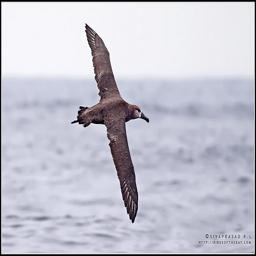

In [ ]:
#img = Image.open('/content/drive/MyDrive/CV materials/hw5.png')
image=cv2.imread('/content/drive/MyDrive/CV materials/hw11.jpg')
cv2_imshow(image)

In [ ]:
from skimage import segmentation, color
from skimage.io import imread
from skimage.future import graph
from matplotlib import pyplot as plt

img_segments = segmentation.slic(image, compactness=20, n_segments=163)
superpixelated_image = color.label2rgb(img_segments, image, kind='avg')

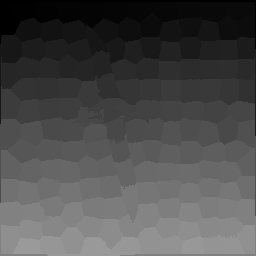

In [ ]:
cv2_imshow(img_segments)

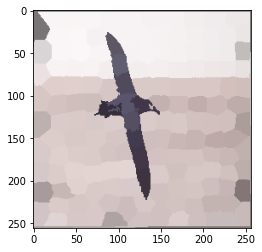

In [ ]:
plt.imshow(superpixelated_image)

In [ ]:
from skimage.measure import regionprops

regions = regionprops(img_segments)
all_centers=[]
for props in regions:
    cx, cy = props.centroid
    all_centers.append([cx,cy])

 Contrast cue and Spatial cues

In [ ]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import math
img2=superpixelated_image
imgarray = img2.reshape((-1, 3)).astype('float32')

In [ ]:
'''criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 6
_, labels, centers = cv2.kmeans(imgarray, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)'''

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
K = 10
retval, labels, centers = cv2.kmeans(imgarray, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
unique, counts = np.unique(labels, return_counts=True)
N=len(imgarray)
print(N)


65536


Contrast cue

In [ ]:
def find_contrast_cue(N,centers):
  contrast_cue_values=[]
  numclusters=len(centers)
  for i in range(numclusters):
    cur_center=centers[i]
    init_sum=0
    for j in range(numclusters):
      if i != j:
        ni=counts[j]
        other_center=centers[j]
        l2norm=math.sqrt(pow(cur_center[0]-other_center[0],2)+pow(cur_center[1]-other_center[1],2)+pow(cur_center[2]-other_center[2],2))
        init_sum=init_sum + ((ni*l2norm)/N)

    contrast_cue_values.append(init_sum)

  return contrast_cue_values

[44.816865135844516, 161.82175301279622, 227.71849456893904, 75.90470223659497, 88.4434022248598, 65.26108807043657, 53.50761829624059, 49.09285388988055, 46.68180507447423, 65.87038779207028]


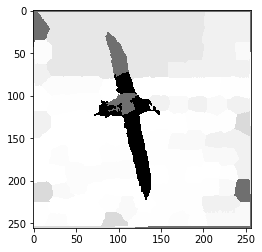

In [ ]:
contrast_cue=find_contrast_cue(N,centers)
print(contrast_cue)
contrast_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image_contrast = contrast_cue_img.reshape((-1))
for i in range(N):
  masked_image_contrast[i]=contrast_cue[labels[i][0]]
masked_image_contrast = masked_image_contrast.reshape((img2.shape[0],img2.shape[1]))
from matplotlib import pyplot as plt
plt.imshow(masked_image_contrast,cmap='Greys', interpolation='nearest')

Spatial cue

In [ ]:
def arrangeclusterwise(orig_image,flat_image,labels):
  all_clusters=[]
  unique, counts = np.unique(labels, return_counts=True)
  for i in range(len(unique)):
    all_clusters.append([])
  for i in range(len(flat_image)):
    all_clusters[labels[i][0]].append([flat_image[i], [i // orig_image.shape[0], i % orig_image.shape[1]]])
  return all_clusters

In [ ]:
all_clusters=arrangeclusterwise(img2,imgarray,labels)

In [ ]:
def find_spatial_cue(all_clusters,image):
  spatial_cue_values=[]
  #center_pixel=image[int(image.shape[0]/2),int(image.shape[1]/2)]
  center_pixel=[image.shape[0]//2,image.shape[1]//2]
  sigma=math.sqrt(image.shape[0]**2+image.shape[1]**2)
  for j in range(len(all_clusters)):
    init_sum=0
    for i in range(len(all_clusters[j])):
        cur_pixel_xy=all_clusters[j][i][1]
        l2norm=(cur_pixel_xy[0]-center_pixel[0])**2 + (cur_pixel_xy[1]-center_pixel[1])**2
        expterm=math.exp(-l2norm/sigma)
        init_sum=init_sum+expterm
    #init_sum=init_sum/len(all_clusters[j])
    init_sum=init_sum
    
    spatial_cue_values.append(init_sum)

  return spatial_cue_values

In [ ]:
spatial_cue=find_spatial_cue(all_clusters,img2)
print(spatial_cue)

[250.06681214066458, 419.7582962735459, 1.4598278523821489e-13, 47.327273862771676, 0.1401200539515936, 108.12374798898803, 3.8730906389248023, 299.1055581855815, 8.983133024106351, 4.341939723839747e-18]


In [ ]:
def rescale_vals(inp_array):
  new_array=[]
  min_val=min(inp_array)
  max_val=max(inp_array)
  for i in inp_array:
    newval = ((i - min_val)*(255/(max_val-min_val)))
    new_array.append(newval)
  return new_array

In [ ]:
rescaled_spat=rescale_vals(spatial_cue)
print(rescaled_spat)

[225.5775324460512, 32.48085382034928, 255.00000000000003, 0.07102175856593045, 0.0, 24.376155063222296, 1.9948551919997137, 0.02896842378097688, 46.28185262682456, 0.0011477936564883646]


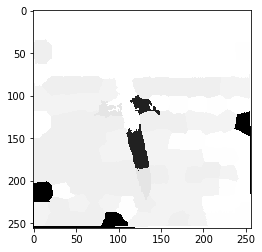

In [ ]:
spatial_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image_spatial = spatial_cue_img.reshape((-1))
for i in range(N):
  #masked_image_spatial[i]=spatial_cue[labels[i][0]]
  masked_image_spatial[i]=rescaled_spat[labels[i][0]]
masked_image_spatial = masked_image_spatial.reshape((img2.shape[0],img2.shape[1]))
from matplotlib import pyplot as plt
plt.imshow(masked_image_spatial,cmap='Greys', interpolation='nearest')

In [ ]:
final_cue=[]
for i in range(len(all_clusters)):
  final_cue.append(contrast_cue[i]*spatial_cue[i])
final_cue

[19628.341344145574,
 10204.943949039154,
 112741.74945446389,
 10.466618330230823,
 1.2911214192728764e-11,
 3088.629387692013,
 207.2398555343309,
 2.761146372064388,
 4194.736268754645,
 0.14679130302486057]

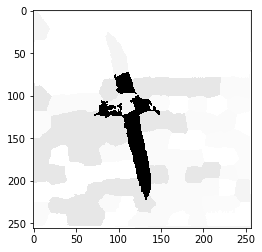

In [ ]:
final_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image_final = final_cue_img.reshape((-1))
for i in range(N):
  masked_image_final[i]=final_cue[labels[i][0]]
masked_image_final = masked_image_final.reshape((img2.shape[0],img2.shape[1]))
from matplotlib import pyplot as plt
plt.imshow(masked_image_final,cmap='Greys', interpolation='nearest')

## Question-3

Calculation of Special measure (Phi)

In [ ]:
def otsu_algorithm(grayimage):
  total_pixels=grayimage.size
  histogram=cv2.calcHist([grayimage],[0],None,[256],[0,256])
  histogram=histogram.astype(int)
  intra_class_array=[]
  #so histogram has 255 values 
  for i in range(1,len(histogram)):
    part1,part2=np.split(histogram,[i])
    w1=(np.sum(part1))/total_pixels
    w2=(np.sum(part2))/total_pixels
    #weights of both classes done, now calculate variance of both the classes
    mean1=np.sum([x*y for x,y in enumerate(part1)])/(np.sum(part1)+0.00001)  #here x is the pixel value and y is the number of pixels for that value
    mean2=np.sum([x2*y2 for x2,y2 in enumerate(part2)])/(np.sum(part2)+0.0001)
    variance1=np.sum([(x-mean1)**2*y for x,y in enumerate(part1)])
    variance2=np.sum([(x-mean2)**2*y for x,y in enumerate(part2)])
    variance1=np.nan_to_num(variance1)
    variance2=np.nan_to_num(variance2)
    mean1=np.nan_to_num(mean1)
    mean2=np.nan_to_num(mean2)
    intra_class=(variance1)+(variance2)
    intra_class_array.append(intra_class)

  min_value=np.argmin(intra_class_array)
  return min_value

In [ ]:
def findDfandDb(fgmean,bgmean,fgstd,bgstd,z):
  Df=math.exp(-1*((z-fgmean)/fgstd)**2)/(fgstd*(math.sqrt(2*3.14)))
  Db=math.exp(-1*((z-bgmean)/bgstd)**2)/(bgstd*(math.sqrt(2*3.14)))
  return [Df,Db]

In [ ]:
def findLs(fgmean,bgmean,fgstd,bgstd,z_1,z_2):
  term1=0
  z_1=int(z_1)
  z_2=int(z_2)
  for dz in range (0,z_1+1):
    curdf=findDfandDb(fgmean,bgmean,fgstd,bgstd,z_1)
    curdf=curdf[0]
    term1=term1+curdf

  term2=0
  for dz in range (z_2,2):
    curdb=findDfandDb(fgmean,bgmean,fgstd,bgstd,z_2)
    curdb=curdb[1]
    term2=term2+curdb

  return term1+term2

In [ ]:
def separation_measure(img):
  threshold=otsu_algorithm(np.float32(img))
  if threshold==0:
    threshold=threshold+30
  print(threshold)
  histogram=cv2.calcHist([np.float32(img)],[0],None,[256],[0,256])
  histogram=histogram.astype(int)
  part1,part2=np.split(histogram,[threshold])
  total_pixels=img.size
  w1=(np.sum(part1))/total_pixels
  w2=(np.sum(part2))/total_pixels
  #weights of both classes done, now calculate variance of both the classes
  mean1=np.sum([x*y for x,y in enumerate(part1)])/(np.sum(part1)+0.00001)  #here x is the pixel value and y is the number of pixels for that value
  mean2=np.sum([x2*y2 for x2,y2 in enumerate(part2)])/(np.sum(part2)+0.0001)
  variance1=np.sum([((x-mean1)**2)*y for x,y in enumerate(part1)])
  variance2=np.sum([((x-mean2)**2)*y for x,y in enumerate(part2)])
  variance1=np.nan_to_num(variance1)
  variance2=np.nan_to_num(variance2)
  mean1=np.nan_to_num(mean1)
  mean2=np.nan_to_num(mean2)

  #foreground = part1 - Pixels with intensity less than threshold
  #background = part2 - Pixels with intensity greater than threshold.
  fg=part1
  bg=part2
  fgmean=mean1
  bgmean=mean2
  fgstd=math.sqrt(variance1)
  bgstd=math.sqrt(variance2)

  fg_zstar=0
  term1=((bgmean*(fgstd**2))-(fgmean*(bgstd**2)))/((fgstd**2)-(bgstd**2))
  term2=(fgstd*bgstd)/((fgstd**2)-(bgstd**2))
  term3=math.sqrt(((fgmean-bgmean)**2)-(2*((fgstd**2)-(bgstd**2))*((math.log(bgstd)-math.log(fgstd)))))

  zstar_1=term1+(term2*term3)
  zstar_2=term1-(term2*term3)

  op=findLs(fgmean,bgmean,fgstd,bgstd,zstar_1,zstar_2)

  phi=1/(1+math.log(1+(255*op),10))

  return phi




In [ ]:
phi_contrast=separation_measure(masked_image_contrast)
print("Phi Contrast is:" , phi_contrast)
phi_spatial=separation_measure(masked_image_spatial)
print("Phi spatial is:" , phi_spatial)


152
Phi Contrast is: 0.3479264345658446
165
Phi spatial is: 0.3638823379911326


In [ ]:
final_cue=[]
for i in range(len(all_clusters)):
  final_cue.append((phi_contrast*contrast_cue[i])+(phi_spatial*rescaled_spat[i]))
final_cue

[97.67665199987239,
 68.12127458903382,
 172.0192800878114,
 26.435095979515793,
 30.771797596968355,
 31.57610998387429,
 19.342607427139743,
 17.091242714341437,
 33.082982739069536,
 22.9184668298038]

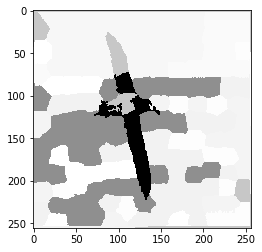

In [ ]:
final_cue_img=np.zeros((img2.shape[0],img2.shape[1]))
masked_image_final = final_cue_img.reshape((-1))
for i in range(N):
  masked_image_final[i]=final_cue[labels[i][0]]
masked_image_final = masked_image_final.reshape((img2.shape[0],img2.shape[1]))
from matplotlib import pyplot as plt
plt.imshow(masked_image_final,cmap='Greys', interpolation='nearest')

------------------------------------------------------------

------------------------------------------------------------

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

img = (masked_image_spatial);
threshold=otsu_algorithm(np.float32(img))
print(threshold)

165


In [ ]:
histogram=cv2.calcHist([np.float32(img)],[0],None,[256],[0,256])
histogram=histogram.astype(int)
part1,part2=np.split(histogram,[threshold])
total_pixels=img.size
w1=(np.sum(part1))/total_pixels
w2=(np.sum(part2))/total_pixels
#weights of both classes done, now calculate variance of both the classes
mean1=np.sum([x*y for x,y in enumerate(part1)])/(np.sum(part1)+0.00001)  #here x is the pixel value and y is the number of pixels for that value
mean2=np.sum([x2*y2 for x2,y2 in enumerate(part2)])/(np.sum(part2)+0.0001)
variance1=np.sum([((x-mean1)**2)*y for x,y in enumerate(part1)])
variance2=np.sum([((x-mean2)**2)*y for x,y in enumerate(part2)])
variance1=np.nan_to_num(variance1)
variance2=np.nan_to_num(variance2)
mean1=np.nan_to_num(mean1)
mean2=np.nan_to_num(mean2)

In [ ]:
#foreground = part1 - Pixels with intensity less than threshold
#background = part2 - Pixels with intensity greater than threshold.
fg=part1
bg=part2
fgmean=mean1
bgmean=mean2
fgstd=math.sqrt(variance1)
bgstd=math.sqrt(variance2)

In [ ]:
fg_zstar=0
term1=((bgmean*(fgstd**2))-(fgmean*(bgstd**2)))/((fgstd**2)-(bgstd**2))
term2=(fgstd*bgstd)/((fgstd**2)-(bgstd**2))
term3=math.sqrt(((fgmean-bgmean)**2)-(2*((fgstd**2)-(bgstd**2))*((math.log(bgstd)-math.log(fgstd)))))

In [ ]:
term3

5964.133148324887

In [ ]:
zstar_1=term1+(term2*term3)
zstar_2=term1-(term2*term3)

In [ ]:
op=findLs(fgmean,bgmean,fgstd,bgstd,zstar_1,zstar_2)

In [ ]:
op

0.2156625344660068

In [ ]:
phi=1/(1+math.log(1+(255*op),10))

In [ ]:
phi

0.3638823379911326